### Análisis de Datos con Pandas
En programación 1, aprendimos a abrir archivos csv usando el paquete `csv`.

Hagamos un repaso 😀

### Paquete CSV

Comencemos leyendo el archivo con csv. Como podrán recordar, extraer información puede ser un poco tedioso ya que para poder obtener todos los valores en una columna, tenemos que recorrer todas las filas del archivo csv.

En este caso vamos a recolectar los precios y los precios clasificados por barrios

In [1]:
import csv
lista_precios = []
precio_por_barrio = {}

with open('listings.csv') as File:
    next(File)
    reader = csv.reader(File, delimiter=',')
    for fila in reader:
        precio = float(fila[9].replace('$', '').replace(',',''))
        lista_precios.append(precio)
        #por barrio
        barrio = fila[5] # neighbourhood
        if barrio in precio_por_barrio:
            precio_por_barrio[barrio].append(precio)
        else:
            precio_por_barrio[barrio] = [precio]

**En** el código de arriba generamos una lista con todos los precios que aparecen en el archivo listing.csv y un diccionario donde las claves son los barrios y los valores son todos los precios de ese barrio. A continuación hacemos una breve exploración de esos datos

(array([4.733e+03, 1.241e+03, 1.360e+02, 4.000e+01, 1.700e+01, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250., 2500.]),
 <BarContainer object of 10 artists>)

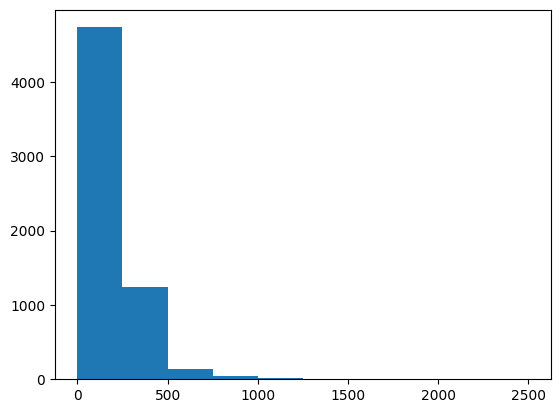

In [2]:
import matplotlib.pyplot as plt
plt.hist(lista_precios)

In [3]:
sum(lista_precios)/len(lista_precios)

198.01960149036125

In [4]:
precio_por_barrio.keys()

dict_keys(['IJburg - Zeeburgereiland', 'Noord-Oost', 'Noord-West', 'Gaasperdam - Driemond', 'Watergraafsmeer', 'Bijlmer-Centrum', 'Geuzenveld - Slotermeer', 'Westerpark', 'Buitenveldert - Zuidas', 'Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost', 'Centrum-West', 'Zuid', 'Oud-Oost', 'De Pijp - Rivierenbuurt', 'Slotervaart', 'De Baarsjes - Oud-West', 'Bos en Lommer', 'Oud-Noord', 'De Aker - Nieuw Sloten', 'Osdorp', 'Bijlmer-Oost'])

In [5]:
# Calculamos el precio promedio en el barrio Bijlmer-Centrum
sum(precio_por_barrio['Bijlmer-Centrum'])/len(precio_por_barrio['Bijlmer-Centrum'])

142.5731707317073

### Paquete Pandas 💗🐼💗🐼💗🐼💗🐼💗

El paquete pandas es muy utilizado en el análisis de datos para leer y manipular archivos de diferentes tipos, en particular el csv.

* Uno de los beneficios más importantes de usar pandas es que nos permite acceder a los datos como si estos fueran una tabla, es decir, puedo acceder a las filas o columnas sin importar cuál es el archivo base.

* Además, nos permite tener los datos asociados a su índice, algo que por ahora no tiene mucho sentido pero lo tendrá más adelante

* Y los datos se ven muy lindos 💣

Según sus creadores pandas es:

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

La documentación de pandas la encuentran acá https://pandas.pydata.org/docs/

In [6]:
import pandas as pd #casi todo el mundo importa pandas así

In [7]:
data = pd.read_csv('listings.csv')

Podemos ver los primeros $n$ registros del archivo utilizando el método `head`

In [8]:
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN


Vamos a ver cómo calculamos el precio promedio de los listings? y por barrio?

In [9]:
data['price'].mean()

198.01960149036125

In [10]:
data[data['neighbourhood']=='Bijlmer-Centrum']['price'].mean()

142.5731707317073

### Beneficios de utilizar pandas
Algunos de los beneficios que vemos a simple vista si usamos pandas comparado con el módulo CSV:


### 🐼 Conceptos Básicos 🐼

- Las estructuras de datos más usadas en pandas son los Dataframes y las Series
- Los DataFrames pueden ser pensados como una tabla y las Series como las columnas de la tabla

In [11]:
#Veamos como es el tipo de datos de DataFrame
type(data)

pandas.core.frame.DataFrame

In [12]:
# Veamos como es el tipo de datos de Series
type(data['price'])

pandas.core.series.Series

Podemos utilizar el comando `head` tanto para DataFrame como para Series.

In [13]:
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN


In [14]:
data['price'].head(5)

0     88
1    105
2    152
3     87
4    160
Name: price, dtype: int64

Además tenemos los siguientes métodos básicos:

* `tail` Nos muestra los _ultimos_ $n$ registros del DataFrame o de la Serie.

In [15]:
data.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6171,36900951,House with big sunny garden in Amsterdam/A'veen,35410939,Saskia,NaN,Buitenveldert - Zuidas,52.31983,4.86463,Entire home/apt,174,3,12,2022-05-23,0.35,1,2,7,NaN
6172,40575103,"Privékamer met badkamer, incl. ontbijt en park...",314410560,Quirien,NaN,Watergraafsmeer,52.33946,4.95749,Private room,65,2,29,2022-05-21,0.96,1,0,15,0384 9B34 0EA9 5CC8 DC7F


In [16]:
data['price'].tail(5)

6168    142
6169     95
6170    180
6171    174
6172     65
Name: price, dtype: int64

* `min` y `max` que permiten obtener el valor mínimo y máximo de una serie, respectivamente.

In [17]:
data['price'].min()

0

In [18]:
data['price'].max()

2500

* `describe` que realiza una descripción básica de una Serie.
  * La cantidad de datos no nulos que contiene.
  * El máximo y el mínimo.
  * El promedio de los valores.
  * La desviación estándar de los mismos.
  * Los _cuartiles_: Son los tres valores que dividen a un conjunto de datos en cuatro partes iguales.


In [19]:
data['price'].describe()

count    6173.000000
mean      198.019601
std       140.546979
min         0.000000
25%       115.000000
50%       160.000000
75%       240.000000
max      2500.000000
Name: price, dtype: float64

Podemos obtener mas información sobre `describe` y sobre cualquier otro método, utilizando la función integrada en el interprete `help`.

In [20]:
help(pd.Series.describe)

Help on function describe in module pandas.core.generic:

describe(self: 'NDFrameT', percentiles=None, include=None, exclude=None, datetime_is_numeric: 'bool_t' = False) -> 'NDFrameT'
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in th

Otro método útil para una Serie es `value_counts`. Consultemos la ayuda para ver que hace:

In [ ]:
help(pd.Series.value_counts)

Help on function value_counts in module pandas.core.base:

value_counts(self, normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, bins=None, dropna: 'bool' = True) -> 'Series'
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
    Returns
    -------
    Series
    

Este método nos da la frecuencia de ocurrencia de cada valor para una serie. Por ejemplo, podemos ver cuantos departamentos hay en alquiler en cada barrio:

In [ ]:
len(precio_por_barrio["Centrum-West"])

838

In [ ]:
data['neighbourhood'].value_counts()

De Baarsjes - Oud-West                    894
Centrum-West                              838
Centrum-Oost                              602
De Pijp - Rivierenbuurt                   593
Westerpark                                417
Zuid                                      376
Oud-Oost                                  324
Bos en Lommer                             258
Oud-Noord                                 254
Watergraafsmeer                           225
Oostelijk Havengebied - Indische Buurt    207
Noord-Oost                                179
Noord-West                                169
IJburg - Zeeburgereiland                  167
Buitenveldert - Zuidas                    123
Slotervaart                               103
Geuzenveld - Slotermeer                   102
De Aker - Nieuw Sloten                     94
Bijlmer-Centrum                            82
Gaasperdam - Driemond                      77
Osdorp                                     60
Bijlmer-Oost                      

Para un DataFrame, es importante conocer la _estructura_ del mismo, es decir, cuantas columnas y cuantas filas contiene. Esto lo podemos ver utilizando el atributo `shape`.

In [ ]:
data.shape

(6173, 18)

Esto nos indica que el archivo contiene 6173 observaciones y 18 columnas o _variables_.

### Concepto de índice
Como probablemente ya vieron en la materia de base de datos, los índices son un elemento muy importantes cuando almacenamos los datos.
Es lo que nos permite referirnos a un dato de forma únivoca. Para determinar el índice de un dataset, vamos a buscar una variable/columna/característica única, es decir, que no tenga repetidos.

Por ejemplo, si en nuestros datos del listing queremos identificar una publicación en particular, ¿como lo haríamos? ¿Con el precio? ¿Con el nombre de la publicación? ¡Probablemente no! Lo que haríamos es referirnos a un listing por su id.

Una característica muy importante de los DFs y Series es que **siempre tienen un índice**. Cuando pandas abre un archivo, automáticamente genera un header, los nombres de las columnas, y genera un índice automáticamente que va de 0 a la longitud del archivo -1.

En nuestros datos, vemos que si bien pandas genera un índice automático, no es el índice que queremos usar, el id del listing. Para poder cambiarlo, vamos a usar el método `df.set_index`


In [21]:
# podemos obtener el nombre de las cabeceras utilizando el atributo `columns`.
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
data.set_index('id').head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN


In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
2,31553121,Quiet Guesthouse near Amsterdam,76806621,Ralf,NaN,Noord-West,52.43237,4.91821,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
3,34745823,"Apartment ' Landzicht', nearby Amsterdam",238083700,Daisy,NaN,Gaasperdam - Driemond,52.29620,5.01231,Entire home/apt,87,2,39,2022-04-17,1.08,3,290,4,NaN
4,44586947,"Weesp, 2 kamers vlakbij Amsterdam",360838688,Aranka,NaN,Gaasperdam - Driemond,52.31475,5.03030,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN


¿Que paso? Cambiamos el índice pero no se vio reflejado en el objeto `data`... ¿Que puede estar pasando?

## La mutabilidad

En la unidad de Programación Orientada a Objetos, vimos que existían dos tipos de métodos:

* Los **métodos puros** que no modifican el estado del objeto sobre el cuál lo llamamos.
* Los **métodos modificadores** que modifican el estado del objeto sobre el cuál lo llamamos.

Por si están olvidados, veamos un ejemplo con una lista de python. Para ordenar una lista, podemos utilizar el método `.sort` ...

In [ ]:
A = [1, 2, 3, 4, 2, 1, 1]
A.sort()
print(A)

[1, 1, 1, 2, 2, 3, 4]


... que modifica la lista "in place". En el mismo objeto A se reordenan los elementos. O bien podemos hacer

In [ ]:
A = [1, 2, 3, 4, 2, 1, 1]
A_ordenada = sorted(A)
print(A_ordenada)

[1, 1, 1, 2, 2, 3, 4]


... que _devuelve_ o _retorna_ una nueva lista con los mismos elementos que A, pero en orden. Notar que aca la lista originar A **sigue existiendo**

In [ ]:
print(A)

[1, 2, 3, 4, 2, 1, 1]


Si queremos, podemos "pisar" la lista A con los valores ordenados simplemente asignando la misma variable al resultado

In [ ]:
A = [1, 2, 3, 4, 2, 1, 1]
A = sorted(A)
print(A)

[1, 1, 1, 2, 2, 3, 4]


En pandas ocurre lo mismo. Casi todos los métodos que modifiquen un dataframe o una serie aceptaran una versión `inplace` pasando el argumento `inplace=True` al método. Si no lo hacemos, pandas se comportará _retornando_ un nuevo objeto con las modificaciones que le pedimos. Luego será nuestra responsabilidad asignar ese objeto a una variable (que puede o no ser la misma, dependiendo de lo que querramos).

In [23]:
# data.set_index('id', inplace = True) #cambia el índice inplace
data = data.set_index("id")
data.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN


**Convención**: Por convención, evitaremos el uso de `inplace=True` y trabajaremos con métodos puros y objetos nuevos siempre que sea posible.

## Indexar
Pandas nos permite acceder a la información dentro de sus DFs y Series mediante sus índices con los atributos .loc y .iloc. `loc` nos permite acceder a los índices por su valor y `iloc` por su posición.
Vamos a poder acceder a un índice o a varios. Y también vamos a poder incluir las columnas

* Primer sabor de loc: Si le pasamos un indice con un valor particular nos devueelve una Serie, donde el indice de la serie son las columnas del dataframe.

In [24]:
data.loc[31553121]

name                              Quiet Guesthouse near Amsterdam
host_id                                                  76806621
host_name                                                    Ralf
neighbourhood_group                                           NaN
neighbourhood                                          Noord-West
latitude                                                 52.43237
longitude                                                 4.91821
room_type                                         Entire home/apt
price                                                         152
minimum_nights                                                  2
number_of_reviews                                              82
last_review                                            2022-05-29
reviews_per_month                                            2.02
calculated_host_listings_count                                  1
availability_365                                                3
number_of_

* Segundo sabor de loc: Podemos pasarle una lista de indices y nos devuelve un dataframe solo con aquellos indices

In [25]:
data.loc[[23726706, 35815036]]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN


* Tercer sabor de loc: Podemos pasarle, ademas, que columna nos interesa. En este caso nos devolverá una serie solo con los indices que le pedimos

In [ ]:
data.loc[[31553121], 'price']

id
31553121    152
Name: price, dtype: int64

* Cuarto sabor de loc: Podemos pasarle una lista de las columnas que queremos. En este caso, nos devolvera un dataframe, que contiene solo los indices que le pedimos y solo las columnas que le pedimos.

In [ ]:
data.loc[[23726706, 35815036], ['price']]

,price
id,
23726706,88
35815036,105


**Convención** Si bien `iloc`, que sirve para acceder a los indices y a las columnas por su posicion y no por su nombre puede ser de utilidad en ciertas situaciones, _lo evitaremos_ siempre que sea posible.

## Haciendo cambios al dataset

### Agregar una columna

Si que

## Ejercicio 1 (15-20 mins):

1. Cargar el archivo `pokemon_data.txt` a un archivo. Deberán investigar el formato del archivo y buscar en las opciones de la función `read_csv` para poder cargarlo correctamente.
2. ¿Como se llaman las columnas de nuestro dataset? ¿Que tipo tiene cada una?
3. Elegir (y setear) un indice para el dataset.
4. Obtener el ataque promedio de un pokemon.
5. Obtener el ataque promedio de un pokemon de primera generacion.
6. Contar cuantos pokemones legendarios y no legendarios hay.
7. Investigar el método `.sort_values` utilizando la función `help` o la documentación de pandas. Utilizarlo para ordenar los pokemons por puntos de salud (HP) desde el mayor al menor.

### Crear un DataFrame
También podemos crear un DataFrame manualmente. ¡Hay muchas maneras de hacerlo!

Instanciamos el objeto diciendo que indices y columnas queremos que tenga y luego "rellenamos" esa tabla:

In [ ]:
df = pd.DataFrame(index = [1,2,3,4], columns = ['col1', 'col2'])

# Podemos utilizar loc/iloc para "rellenar" el DF!

df.loc[1, "col1"] = 2
df.loc[2, "col2"] = 5
df.loc[2, "col2"] = 3
# print(df.loc[2, "col2"])
print(df)

  col1 col2
1    2  NaN
2  NaN    3
3  NaN  NaN
4  NaN  NaN


Sin embargo, lo mas común es leer directamente el DataFrame de una fuente de datos tabular con la familia de funciones `read_*`. Hay una para cada necesidad pero las mas usadas son:

* `read_csv` para leer un archivo en formato csv.
* `read_excel` para leer un archivo en formato excel.

**Tarea**: Leer la documentacion de estas funciones.

### Operadores
Veamos que operaciones podemos aplicarle a una Serie de pandas

In [ ]:
import numpy as np

In [ ]:
df = pd.DataFrame(index = list(range(10)), columns = ['a', 'b', 'c'])
df['a'] = np.random.rand(10,1)
df['b'] = 1
df['c'] = np.random.rand(10,1)
df

,a,b,c
0,0.133440,1,0.622507
1,0.645310,1,0.658501
2,0.616573,1,0.377244
3,0.358085,1,0.054996
4,0.128940,1,0.550019
5,0.963963,1,0.323069
6,0.350386,1,0.667491
7,0.692231,1,0.491379
8,0.545672,1,0.869748
9,0.802998,1,0.762250


In [ ]:
# suma
df['a'] + df['b']

0    1.133440
1    1.645310
2    1.616573
3    1.358085
4    1.128940
5    1.963963
6    1.350386
7    1.692231
8    1.545672
9    1.802998
dtype: float64

In [ ]:
# Podemos guardar la serie resultado en una nueva columna asi de facil:
df['d'] = df['a'] + df['b']
df

,a,b,c,d
0,0.133440,1,0.622507,1.133440
1,0.645310,1,0.658501,1.645310
2,0.616573,1,0.377244,1.616573
3,0.358085,1,0.054996,1.358085
4,0.128940,1,0.550019,1.128940
5,0.963963,1,0.323069,1.963963
6,0.350386,1,0.667491,1.350386
7,0.692231,1,0.491379,1.692231
8,0.545672,1,0.869748,1.545672
9,0.802998,1,0.762250,1.802998


In [ ]:
# resta
df['a'] - df['b']

0   -0.866560
1   -0.354690
2   -0.383427
3   -0.641915
4   -0.871060
5   -0.036037
6   -0.649614
7   -0.307769
8   -0.454328
9   -0.197002
dtype: float64

In [ ]:
# multiplicación
df['a'] * df['b']


0    0.133440
1    0.645310
2    0.616573
3    0.358085
4    0.128940
5    0.963963
6    0.350386
7    0.692231
8    0.545672
9    0.802998
dtype: float64

## Ejercicio 2 (5min)
1. Utilizando el dataset de los pokemons, calcular para cada pokemon la suma de sus estadisticas (Puntos de salud + Ataque + Defensa + Ataque Especial + Defensa especial + Velocidad)

# El famoso NaN

Cuando trabajamos con un DataFrame, especialmente si es extenso, podemos tener problemas con lo valores NaN. Los NaN (“Not a Number“) son valores vacíos no computables que debemos tratar en nuestros conjuntos de datos antes de trabajar con ellos.

**Nota** Si bien NaN significa Not a Number, es un valor que no es un número, ni un string, ni ningun tipo de objeto conocido, ni siquiera `None`!. Es un valor especial que se utiliza en pandas para marcar aqullas posiciones de la tabla donde no hay ningún valor válido.

Veremos algunos códigos de Python que pueden ayudarnos a trabajar con los NaN.

* Podemos utilizar lo siguiente para saber si hay algún valor NaN en nuestro DataFrame

In [ ]:
data.isnull().values.any()


True

Hay valores faltantes! Para saber en que columnas se encuentran hacemos:

In [ ]:
data.isnull().any()


name                              False
host_id                           False
host_name                         False
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool

Vemos que tenemos valores faltantes en las columnas `neighbourhood_group` y otras. Para ver _cuantos_ valores faltan, podemos reemplazar `any` por `sum` en el codigo anterior:

In [ ]:
data.isnull().sum()

name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6173
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        590
reviews_per_month                  590
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            415
dtype: int64

Podemos aplicar el método `sum` nuevamente para contar cuantos NaN tenemos en total:

In [ ]:
data.isnull().sum().sum()


7768

Dependiendo que analisis querramos hacer, quizá tengamos que remover esos valores faltantes de nuestro DataFrame. Esto lo podemos hacer con el método `dropna`, veamos la ayuda para saber como utilizarlo:

In [ ]:
help(pd.DataFrame.dropna)

Help on function dropna in module pandas.core.frame:

dropna(self, *, axis: 'Axis' = 0, how: 'str | NoDefault' = <no_default>, thresh: 'int | NoDefault' = <no_default>, subset: 'IndexLabel' = None, inplace: 'bool' = False) -> 'DataFrame | None'
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at l

Aja! Lo podemos usar en dos modos. Para obtener un DataFrame sin los indices que tienen valores faltantes para alguna columna:

In [ ]:
data_sin_indices_con_valores_faltantes = data.dropna(axis='index')
print(data_sin_indices_con_valores_faltantes.shape)

(0, 17)


In [ ]:
data_sin_indices_con_valores_faltantes

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,


No nos queda ningun valor! Esto es porque la columna `neighbourhood_group` era vacia, no contenia ningun valor. Entonces en este caso puede ser mejor obtener el dataframe que tenga todos los datos - pero sin las columnas que tienen valores faltantes.

In [ ]:
data_sin_columnas_con_valores_faltantes = data.dropna(axis='columns')
print(data_sin_columnas_con_valores_faltantes.shape)

(6173, 13)


Otra opción, que puede ser útil en ciertos casos, es reemplazar todos los valores faltantes por algo que sea un valor típico para dicha variable. Para ejemplificar, veamos como podriamos "rellenar" los valores de `reviews_per_month` con 0, o con el valor promedio de todos los valores para los que si tengo el dato:

In [ ]:
data['reviews_per_month']

id
23726706    1.53
35815036    2.65
31553121    2.02
34745823    1.08
44586947    0.68
            ... 
48005583    0.77
29532926    2.64
35760705     NaN
36900951    0.35
40575103    0.96
Name: reviews_per_month, Length: 6173, dtype: float64

In [ ]:
data['reviews_per_month'].fillna(0)

id
23726706    1.53
35815036    2.65
31553121    2.02
34745823    1.08
44586947    0.68
            ... 
48005583    0.77
29532926    2.64
35760705    0.00
36900951    0.35
40575103    0.96
Name: reviews_per_month, Length: 6173, dtype: float64

In [ ]:
data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

id
23726706    1.530000
35815036    2.650000
31553121    2.020000
34745823    1.080000
44586947    0.680000
              ...   
48005583    0.770000
29532926    2.640000
35760705    1.211241
36900951    0.350000
40575103    0.960000
Name: reviews_per_month, Length: 6173, dtype: float64

# Filtrado de datos

Muchas veces no queremos realizar el analisis sobre todo el dataFrame, si no solo sobre una porcion. Para ello pandas nos permite realizar filtrados.

El filtrado se hace por condiciones, es decir nos quedamos con el subconjunto de datos que cumple cierta restricción. Por ejemplo, para obtener todos los departamentos que tiene al menos dos reviews por mes:

In [ ]:
data[ data['reviews_per_month'] >= 2 ]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.424190,4.956890,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
31553121,Quiet Guesthouse near Amsterdam,76806621,Ralf,NaN,Noord-West,52.432370,4.918210,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
19572024,"Coachhouse, in nature only 5 km from Amsterdam",81955946,Amber,NaN,Watergraafsmeer,52.307390,4.908330,Entire home/apt,279,3,126,2022-05-29,2.13,2,298,23,NaN
620821365404674198,"Homestay, 10 minutes away from the city center.",405567985,Homestay Amsterdam,NaN,Bijlmer-Centrum,52.329773,4.937512,Private room,120,1,3,2022-05-30,3.00,1,343,3,NaN
33241583,ID APARTHOTEL - *** 3-Bedroom Apartment,243869294,Sophie,NaN,Geuzenveld - Slotermeer,52.388600,4.833310,Private room,742,1,79,2022-05-22,2.14,5,342,33,Exempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54326276,The Sixpack - 6 person bunkbed room.,342059962,David,NaN,Geuzenveld - Slotermeer,52.385670,4.831610,Private room,270,1,11,2022-05-22,3.11,12,350,11,Exempt
557194226234491250,"Charming cottage in rural area, 5 km to Amsterdam",11029411,Yvonne,NaN,Watergraafsmeer,52.311409,4.906022,Entire home/apt,272,3,6,2022-05-29,3.27,1,6,6,NaN
854052,Rustig slapen na een drukke dag in Amsterdam,4043241,Kees&Karin,NaN,Watergraafsmeer,52.340752,4.958290,Private room,65,2,289,2022-05-30,2.52,1,1,21,03845fb98b259492e582


Se puede filtar por condiciones **compuestas**, es decir por proposiciones complejas que involucren operadores lógicos. Los operadores lógicos son los siguientes:

* Y: se deben cumplir ambas condiciones para que el dato este en el resultado, similar al `and` que hacemos en los condicionales de Python, pero acá se utiliza el operador ampersand &.
* O: se debe cumplir al menos una de las dos condiciones para que el datos este en el resultado, similar al `or` que hacemos en los condicionales de Python, pero acá se utiliza el operador pipe | .
* NO: no se debe cumplir la condicion para que el dato este en el resultado, similar al `not` nativo, solo que se utiliza la virgulilla como operador ~.

Por ejemplo, podemos obtener todos los departamentos que tengan al menos 2 reviews por mes y ademas al menos 90 reviews en total de la siguiente forma

In [ ]:
data[ (data['reviews_per_month'] >= 2) & (data['number_of_reviews'] >= 90) ]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.424190,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
19572024,"Coachhouse, in nature only 5 km from Amsterdam",81955946,Amber,NaN,Watergraafsmeer,52.307390,4.90833,Entire home/apt,279,3,126,2022-05-29,2.13,2,298,23,NaN
33241443,ID APARTHOTEL - *** Studio Apartment,243869294,Sophie,NaN,Geuzenveld - Slotermeer,52.388180,4.83349,Private room,230,1,108,2022-04-22,2.81,5,354,17,Exempt
20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.364070,4.89393,Private room,106,1,339,2020-04-09,2.27,2,0,0,0363 CBB3 2C10 0C2A 1E29
28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.367750,4.89092,Private room,75,2,403,2022-06-04,2.81,2,156,67,0363 607B EA74 0BD8 2F6F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28769123,Cityden Aparthotels | Studio XXL,214764531,Cityden,NaN,Buitenveldert - Zuidas,52.316990,4.87181,Private room,238,1,164,2022-05-15,4.82,5,353,95,NaN
33241384,ID APARTHOTEL - *** 2-Bedroom Apartment,243869294,Sophie,NaN,Geuzenveld - Slotermeer,52.386800,4.83541,Private room,356,1,155,2022-05-15,4.16,5,354,124,Exempt
854052,Rustig slapen na een drukke dag in Amsterdam,4043241,Kees&Karin,NaN,Watergraafsmeer,52.340752,4.95829,Private room,65,2,289,2022-05-30,2.52,1,1,21,03845fb98b259492e582


**Nota**: Las condiciones para filtrar se pueden complejizar tanto como se desee. Es importante encerrar entre parentesis cada condicion para evitar errores.

Para filtrar por valores numericos, podemos utilizar los operadores de comparacion. Para filtrar por strings, tambien podemos filtrar por igualdad. Por ejemplo, podemos obtener todos los departamos que tengan `room_type` igual a "Private room":

In [ ]:
data[ data['room_type'] == "Private room" ]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.349160,4.978790,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
44586947,"Weesp, 2 kamers vlakbij Amsterdam",360838688,Aranka,NaN,Gaasperdam - Driemond,52.314750,5.030300,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN
15801253,Studio with own bathroom & kitchen at East A'dam,21813940,Nan,NaN,Watergraafsmeer,52.345070,4.964130,Private room,90,2,46,2022-05-29,0.89,1,164,7,0384 81F7 167A BBAA 3BE2
18801518,Coronaproof studio 20 min to A'dam Centre 2-4 ...,75979829,Randje Amsterdam,NaN,Watergraafsmeer,52.338280,4.964430,Private room,140,2,85,2022-04-17,1.42,1,234,5,038429E48399CA3E3903
620821365404674198,"Homestay, 10 minutes away from the city center.",405567985,Homestay Amsterdam,NaN,Bijlmer-Centrum,52.329773,4.937512,Private room,120,1,3,2022-05-30,3.00,1,343,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48840480,Cityden Aparthotels | 1-Bedroom Apartment,214764531,Cityden,NaN,Buitenveldert - Zuidas,52.317800,4.872480,Private room,246,1,9,2022-05-27,0.82,5,348,9,NaN
47717234,Double Room in 4 Star Hotel,382681673,Pauline,NaN,Geuzenveld - Slotermeer,52.387790,4.836010,Private room,499,4,0,NaN,NaN,2,365,0,Exempt
854052,Rustig slapen na een drukke dag in Amsterdam,4043241,Kees&Karin,NaN,Watergraafsmeer,52.340752,4.958290,Private room,65,2,289,2022-05-30,2.52,1,1,21,03845fb98b259492e582


Tambien podemos hacer busquedas mas complejas. Para verlo, carguemos la version del dataset de listings que contiene las descripciones de cada apartamento.

In [ ]:
data_completo = pd.read_csv('listings.csv.gz')
data_completo = data_completo.dropna(axis='index', subset=['description'])
data_completo.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
data_completo['description'].head(2)

0    Cousy  private room 20 min. from Amsterdam. Sh...
1    Bij het pittoreske dorpje Watergang ligt ons p...
Name: description, dtype: object

¿Podremos encontrar todos los departamentos que mencionen la palabra "gato" (cat) en descripcion?

In [ ]:
data_completo[ data_completo['description'] == "cat" ]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [ ]:
data_completo[ data_completo['description'].str.contains(" cat ") ]["description"].iloc[2]

'We rent out our apartment for the duration of our holidays. It is 45m2, furnished, trendy neighborhood,  good connection, and a cat who might stay at home.<br /><br /><b>The space</b><br />This apartment is 45 square meters and part of an old Amsterdam building. It is located in the East, on the border with the Center. It has a living room, kitchen, bedroom, small shower/toilet, balcony, and comes with all needed furnishing. This apartment is our permanent place of living, therefore you will have everything that you need for a stay - Internet, double bed, hot shower, washing machine, dishwasher, oven, various kitchen equipment, dishes, etc.<br /><br /><b>Guest access</b><br />The whole apartment is accessible, except for the personal belongings in the wardrobes. Most of white plastic wardrobes/boxes  with the personal belongings cannot be accessed. <br /><br />All kitchen/household equipment and dishes can be accessed. All bathroom cleaning supplies (shower gel, shampoo, etc.) can be 

El descriptor `str` nos da acceso a utilizar los métodos de strings sobre una serie que contiene strings. En el ejemplo utilizamos `contains` pero podriamos utilizar tambien split, replace, etc.





## Ejercicio 3 - hasta el fin de clase:

Descargar el archivo de distribución de empleo formal en el AMBA de este [link](https://www.datos.gob.ar/dataset/produccion-distribucion-empleo-formal-amba) (el que en su título dice hasta CLAE2)

1. Leer el archivo con pandas dataframe.
2. Determinar cual debe ser el indice del dataframe.
3. Realizar un analisis de valores faltantes, tomar acciones en consecuencia.
4.   Calcular la cantidad de departamentos y sectores (CLAE 2 dígitos) qué emplean:

  1.   solo hombres
  2.   solo mujeres
  3.   a ambos géneros

5. Calcular la remuneración media para hombres y para mujeres
6. Calcular la remuneración media para mujeres en el CLAE = 6

Nota: realizar consideración acerca del promedio de promedios

7. Leer la documentación, e investigar el uso, de los siguientes métodos de pandas:
  - where
  - mask
  - clip
  - sort_values
  - rename
  - unique